In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("G:/Data_sets/activitydetection.csv")

In [3]:
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [4]:
df.shape

(16382, 7)

In [5]:
df.isnull().any()

ACTIVITY       False
TIME           False
SL             False
EEG            False
BP             False
HR             False
CIRCLUATION    False
dtype: bool

In [6]:
df.dtypes

ACTIVITY         int64
TIME           float64
SL             float64
EEG            float64
BP               int64
HR               int64
CIRCLUATION      int64
dtype: object

In [7]:
def act(a):
    if a==0:
        a="Standing"
    elif a==1:
        a="Walking"
    elif a==2:
        a="Sitting"
    elif a==3:
        a="Falling"
    elif a==4:
        a="Cramps"
    elif a==5:
        a="Running"
    return a

In [8]:
df["ACTIVITY"] = df["ACTIVITY"].apply(lambda x: act(x))

In [9]:
df

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,Falling,4722.92,4019.64,-1600.00,13,79,317
1,Sitting,4059.12,2191.03,-1146.08,20,54,165
2,Sitting,4773.56,2787.99,-1263.38,46,67,224
3,Cramps,8271.27,9545.98,-2848.93,26,138,554
4,Cramps,7102.16,14148.80,-2381.15,85,120,809
...,...,...,...,...,...,...,...
16377,Cramps,9280.68,11417.00,-3021.64,36,156,654
16378,Falling,8479.69,9455.54,-2932.85,17,138,554
16379,Sitting,8872.53,27449.90,-2870.00,33,156,1364
16380,Cramps,7738.99,26466.40,-2920.24,97,156,1521


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

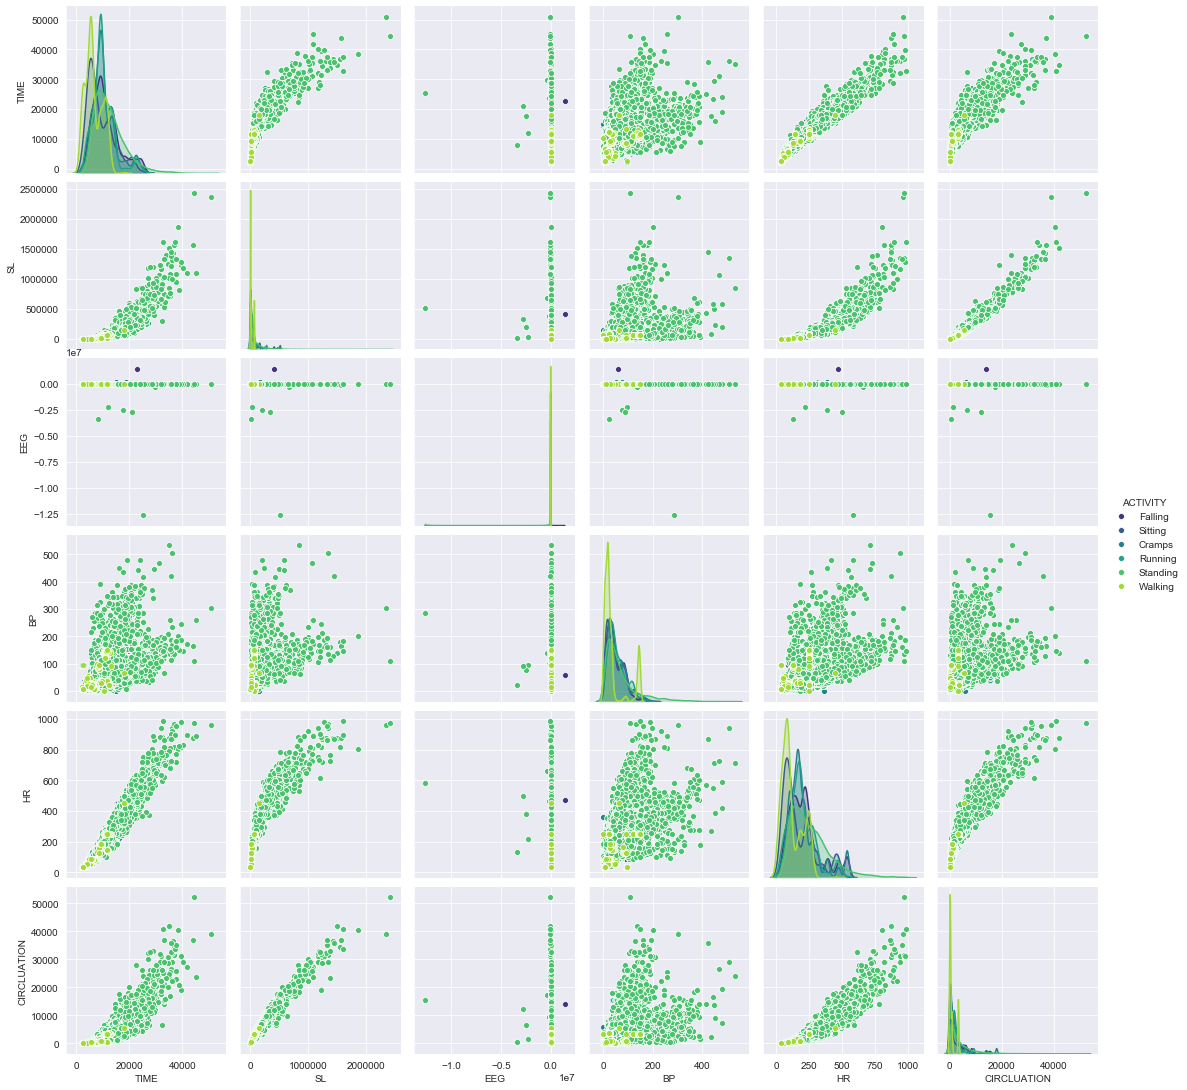

In [11]:
sns.set_style("darkgrid")
sns.pairplot(data = df, hue = "ACTIVITY",palette = "viridis")

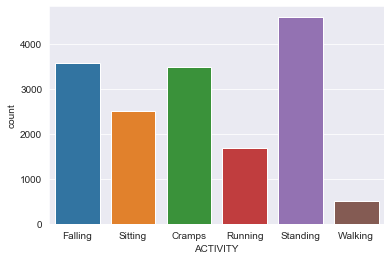

In [12]:
sns.countplot(x=df["ACTIVITY"])

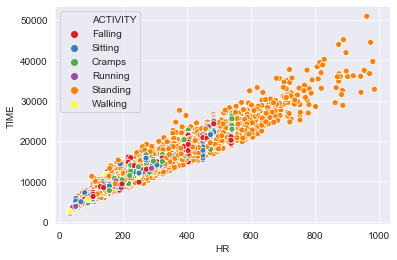

In [13]:
sns.scatterplot(x="HR",y="TIME",data=df, hue = "ACTIVITY",palette="Set1")

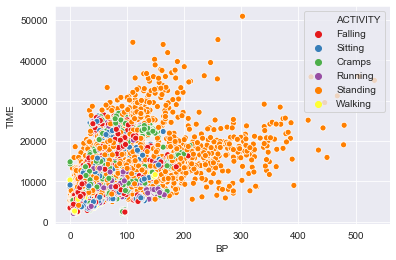

In [14]:
sns.scatterplot(x="BP",y="TIME",data=df, hue = "ACTIVITY",palette="Set1")

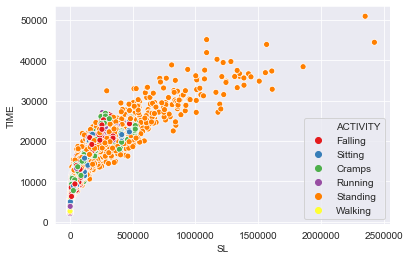

In [15]:
sns.scatterplot(x="SL",y="TIME",data=df, hue = "ACTIVITY",palette="Set1")

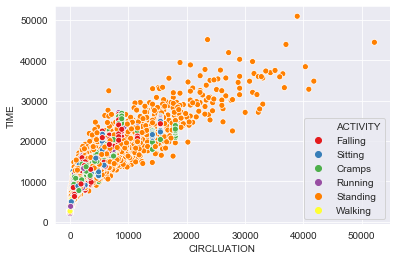

In [16]:
sns.scatterplot(x="CIRCLUATION",y="TIME",data=df, hue = "ACTIVITY",palette="Set1")

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
x = df.drop("ACTIVITY", axis = 1)
y = df["ACTIVITY"]

x_test,x_train,y_test,y_train = train_test_split(x, y, test_size=0.50, random_state=106)

In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
pred = dtree.predict(x_test)

from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Probabilities for each class
rf_probs = dtree.predict_proba(x_test)[:, ]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs, multi_class="ovr",average='macro')

In [21]:
from sklearn.metrics import accuracy_score,classification_report
print("Classification_Report\n",classification_report(y_test,pred))
print("\n")
print("Accuracy_Score\n",accuracy_score(y_test,pred))
print("\n")
print("roc_auc score\n",roc_value)

Classification_Report
               precision    recall  f1-score   support

      Cramps       0.56      0.58      0.57      1775
     Falling       0.58      0.63      0.60      1769
     Running       0.55      0.53      0.54       875
     Sitting       0.65      0.67      0.66      1261
    Standing       0.91      0.81      0.85      2263
     Walking       0.70      0.72      0.71       248

    accuracy                           0.67      8191
   macro avg       0.66      0.66      0.66      8191
weighted avg       0.68      0.67      0.67      8191



Accuracy_Score
 0.6667073617384934


roc_auc score
 0.7939196412236772


In [25]:
rftree = RandomForestClassifier(n_estimators=700)
rftree.fit(x_train,y_train)

RandomForestClassifier(n_estimators=700)

In [26]:
pred_ens = rftree.predict(x_test)


# Probabilities for each class
rf_probs = rftree.predict_proba(x_test)[:, ]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs, multi_class="ovr",average='macro')


In [27]:
print("Classification_Report\n",classification_report(y_test,pred_ens))
print("\n")
print("Accuracy_Score\n",accuracy_score(y_test,pred_ens))
print("\n")
print("roc_auc score\n",roc_value)

Classification_Report
               precision    recall  f1-score   support

      Cramps       0.66      0.64      0.65      1775
     Falling       0.64      0.74      0.69      1769
     Running       0.73      0.56      0.63       875
     Sitting       0.74      0.71      0.73      1261
    Standing       0.94      0.95      0.95      2263
     Walking       0.77      0.78      0.78       248

    accuracy                           0.75      8191
   macro avg       0.75      0.73      0.74      8191
weighted avg       0.76      0.75      0.75      8191



Accuracy_Score
 0.754486631668905


roc_auc score
 0.9412492435873242
